In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
california_df = fetch_california_housing()

In [3]:
california_df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df = pd.DataFrame(california_df.data, columns=california_df.feature_names)
df['Target']= california_df.target
df.shape

(20640, 9)

In [41]:
df=df.sample(frac=0.25)

In [42]:
df.shape

(1548, 9)

In [43]:
##independent & dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [44]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5707,3.5174,36.0,4.547945,1.094368,1357.0,2.065449,34.21,-118.23
12590,5.5208,33.0,6.833724,1.028103,1085.0,2.540984,38.51,-121.51
14426,2.5568,32.0,3.731935,1.090909,731.0,1.703963,32.80,-117.25
6346,2.1908,37.0,3.669903,0.893204,503.0,4.883495,34.05,-117.75
8612,4.1190,28.0,5.075614,1.098299,1243.0,2.349716,33.86,-118.37


In [45]:
y.head()

5707     2.680
12590    1.713
14426    2.583
6346     0.946
8612     3.240
Name: Target, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [47]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

In [48]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [49]:
y_pred = regressor.predict(X_test)


In [50]:
y_pred

array([5.00001, 5.00001, 1.163  , 3.006  , 1.446  , 4.445  , 2.688  ,
       4.026  , 3.19   , 2.6    , 1.876  , 3.257  , 1.506  , 1.181  ,
       1.43   , 0.704  , 5.00001, 1.506  , 1.313  , 0.758  , 1.791  ,
       2.692  , 0.758  , 5.00001, 2.482  , 0.855  , 1.181  , 0.656  ,
       0.844  , 1.521  , 0.779  , 0.835  , 5.00001, 0.958  , 2.866  ,
       2.864  , 1.689  , 1.652  , 0.621  , 2.667  , 0.813  , 1.272  ,
       2.367  , 3.379  , 0.9    , 2.794  , 3.379  , 0.636  , 0.762  ,
       1.188  , 2.453  , 4.03   , 1.918  , 0.721  , 2.728  , 5.00001,
       2.18   , 0.955  , 5.00001, 0.941  , 3.5    , 0.769  , 2.461  ,
       2.083  , 1.625  , 2.811  , 1.961  , 2.246  , 0.616  , 2.271  ,
       0.556  , 1.652  , 1.031  , 1.228  , 1.272  , 1.272  , 2.056  ,
       4.357  , 1.804  , 2.75   , 3.318  , 1.587  , 1.215  , 1.646  ,
       4.103  , 1.403  , 2.552  , 3.78   , 2.11   , 3.017  , 0.672  ,
       1.804  , 1.943  , 0.73   , 0.732  , 5.00001, 3.289  , 1.42   ,
       1.031  , 2.73

In [51]:
from sklearn.metrics import r2_score
score = r2_score(y_pred, y_test)
print(score)

0.3808293993080797


In [52]:
## hyperparameter tunning
parameter={
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth' : [1,2,3,4,5,6,7,8,9,10,11,12],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [53]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
regressorcv = GridSearchCV(regressor,param_grid= parameter, cv=2, scoring = 'neg_mean_squared_error')

In [54]:
regressorcv.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

In [55]:
regressorcv.best_params_

{'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'auto'}

In [59]:
reg= DecisionTreeRegressor(criterion='friedman_mse',max_depth=5, max_features='auto')

In [60]:
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='auto')

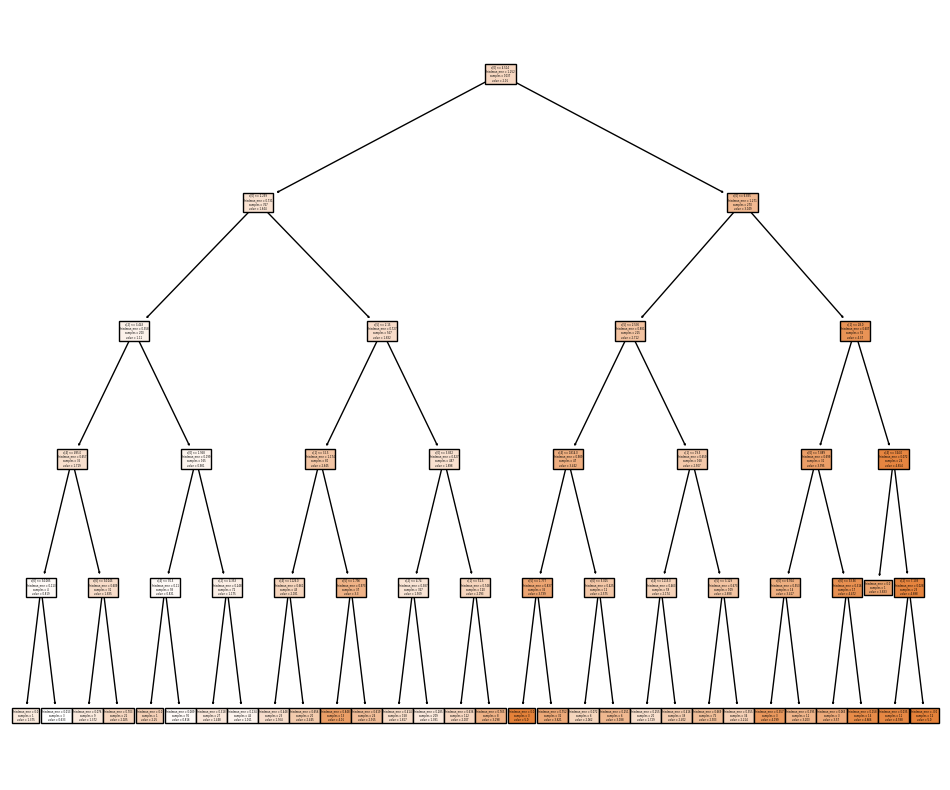

In [61]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(reg, filled=True)
plt.show()

In [63]:
y_pred = reg.predict(X_test)

In [64]:
r2_score(y_pred, y_test)

0.4158394903434035